<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [4]:
## Write your code here
print(df.shape)
print(df.columns)
print(df.dtypes)
df.info()

(65437, 114)
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [5]:
## Write your code here
missing_values = df.isnull().sum().reset_index()
headers = ['column','count']
missing_values.columns = headers
missing_values.sort_values(by='count', ascending=False, inplace=False).reset_index(drop=True)

,column,count
0,AINextMuch less integrated,64289
1,AINextLess integrated,63082
2,AINextNo change,52939
3,AINextMuch more integrated,51999
4,EmbeddedAdmired,48704
...,...,...
109,MainBranch,0
110,Age,0
111,Employment,0
112,Check,0


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [6]:
## Write your code here
print(df['Employment'].value_counts().reset_index())
#print(df['Employment'].unique())
df = df.dropna(subset=['Employment','JobSat','YearsCodePro'])

df1 = df.assign(Employment=df['Employment'].str.split(';')).explode('Employment')
print(df1['Employment'].value_counts().reset_index())

#print(df['JobSat'].value_counts().reset_index())
print(df['JobSat'].unique())

print(df['YearsCodePro'].dtype)
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0',
    'More than 50 years': '51'
}).astype(int)
print(df['YearsCodePro'].unique())
print(df['YearsCodePro'].dtype)

                                            Employment  count
0                                  Employed, full-time  39041
1    Independent contractor, freelancer, or self-em...   4846
2                                   Student, full-time   4709
3    Employed, full-time;Independent contractor, fr...   3557
4                   Not employed, but looking for work   2341
..                                                 ...    ...
105  Not employed, but looking for work;Independent...      1
106                         Student, full-time;Retired      1
107  Employed, full-time;Not employed, but looking ...      1
108  Not employed, and not looking for work;Student...      1
109  Not employed, but looking for work;Independent...      1

[110 rows x 2 columns]
                                          Employment  count
0                                Employed, full-time  25475
1  Independent contractor, freelancer, or self-em...   4196
2                                Employed, part-time

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


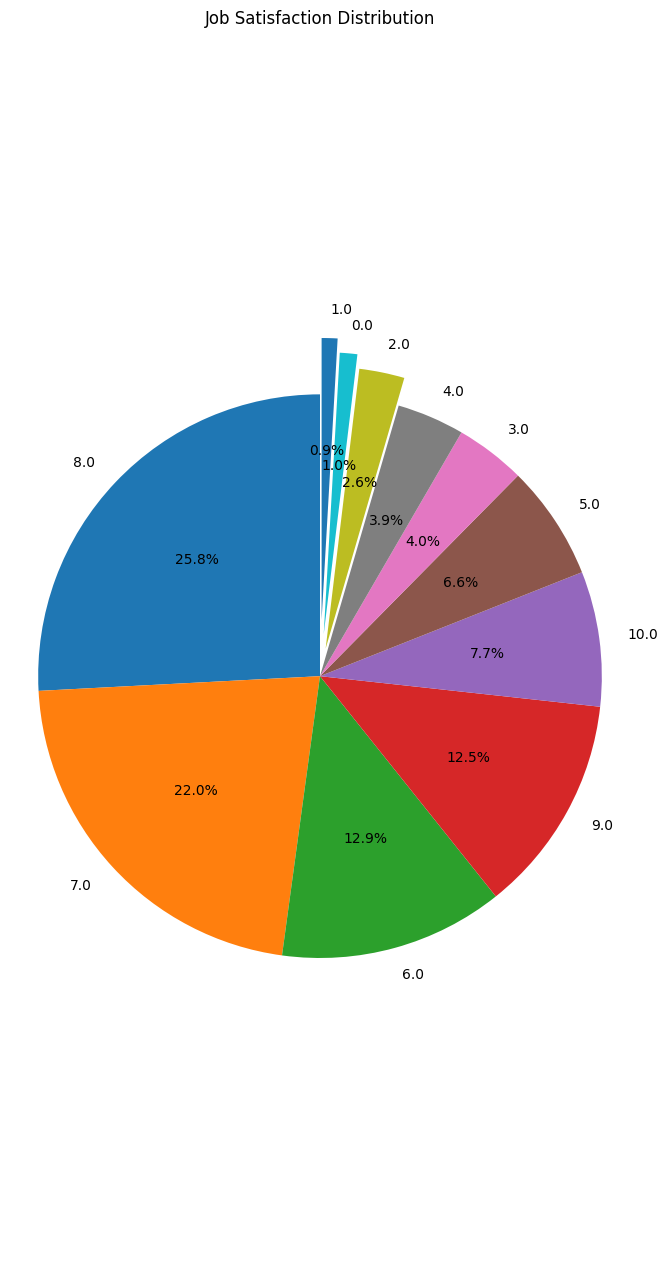

In [7]:
## Write your code here
job_sat_counts = df['JobSat'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 16))

plt.pie(job_sat_counts, labels=job_sat_counts.index, autopct='%1.1f%%', startangle=90, explode = [0,0,0,0,0,0,0,0,0.1,0.15,0.2])
plt.title('Job Satisfaction Distribution')
plt.axis('equal') 
plt.show()

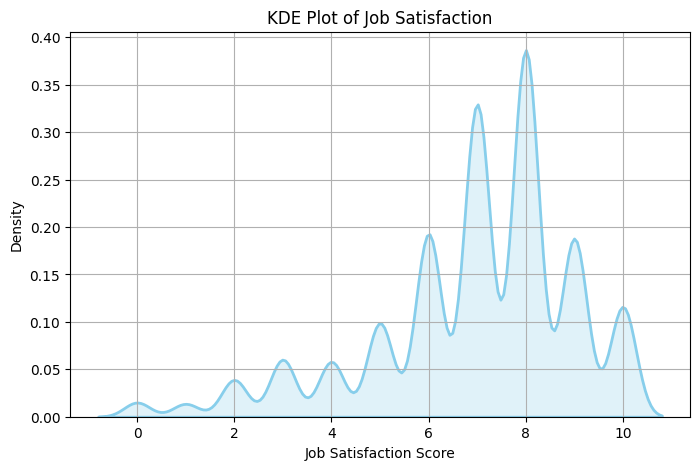

In [8]:
job_sat = df['JobSat']

# Plot KDE
plt.figure(figsize=(8, 5))
sns.kdeplot(job_sat, fill=True, color='skyblue', linewidth=2)

# Labels and title
plt.title('KDE Plot of Job Satisfaction')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Density')

plt.grid(True)
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [9]:
## Write your code here
#!pip install matplotlib-venn
#from matplotlib_venn import venn2

df = df.dropna(subset=['LanguageWantToWorkWith', 'LanguageHaveWorkedWith'])
df2 = df.assign(Language=df['LanguageHaveWorkedWith'].str.split(';'),
                LanguageWant=df['LanguageWantToWorkWith'].str.split(';')
).explode('Language').explode('LanguageWant')
want_set = set(df2['LanguageWant'].unique())
worked_set = set(df2['Language'].unique())
worked_counts = df2['Language'].value_counts()
want_counts = df2['LanguageWant'].value_counts()

# Create DataFrame for easy comparison
lang_compare = pd.DataFrame({
    'Have Worked With': worked_counts,
    'Want To Work With': want_counts
}).fillna(0)
lang_compare

,Have Worked With,Want To Work With
Ada,1175,1462
Apex,1632,1326
Assembly,7750,8626
Bash/Shell (all shells),59029,48301
C,28057,23142
C#,42374,40705
C++,31041,28860
Clojure,2165,4736
Cobol,1467,1665
Crystal,1086,1825


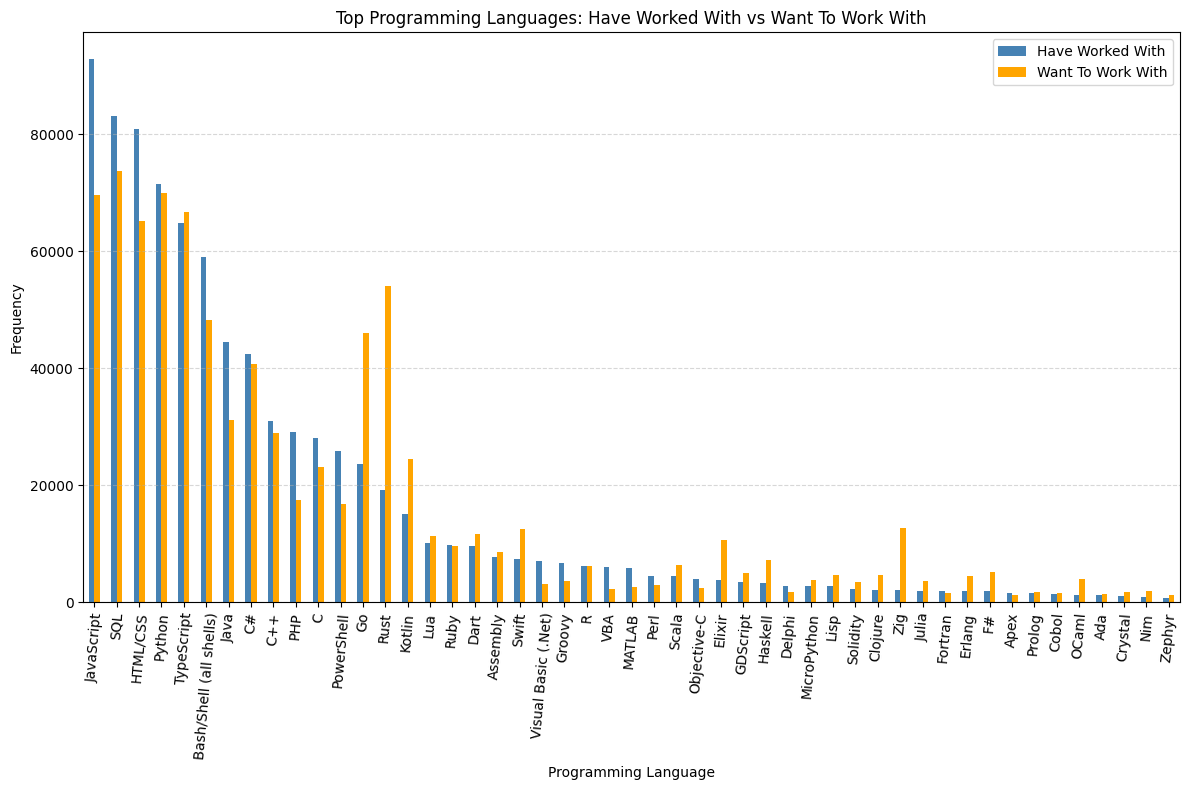

In [10]:
top_langs = lang_compare.sort_values('Have Worked With', ascending=False)

# Plot grouped bar chart
top_langs.plot(kind='bar', figsize=(12, 8), color=['steelblue', 'orange'])

# Customizations
plt.title('Top Programming Languages: Have Worked With vs Want To Work With')
plt.xlabel('Programming Language')
plt.ylabel('Frequency')
plt.xticks(rotation=85)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


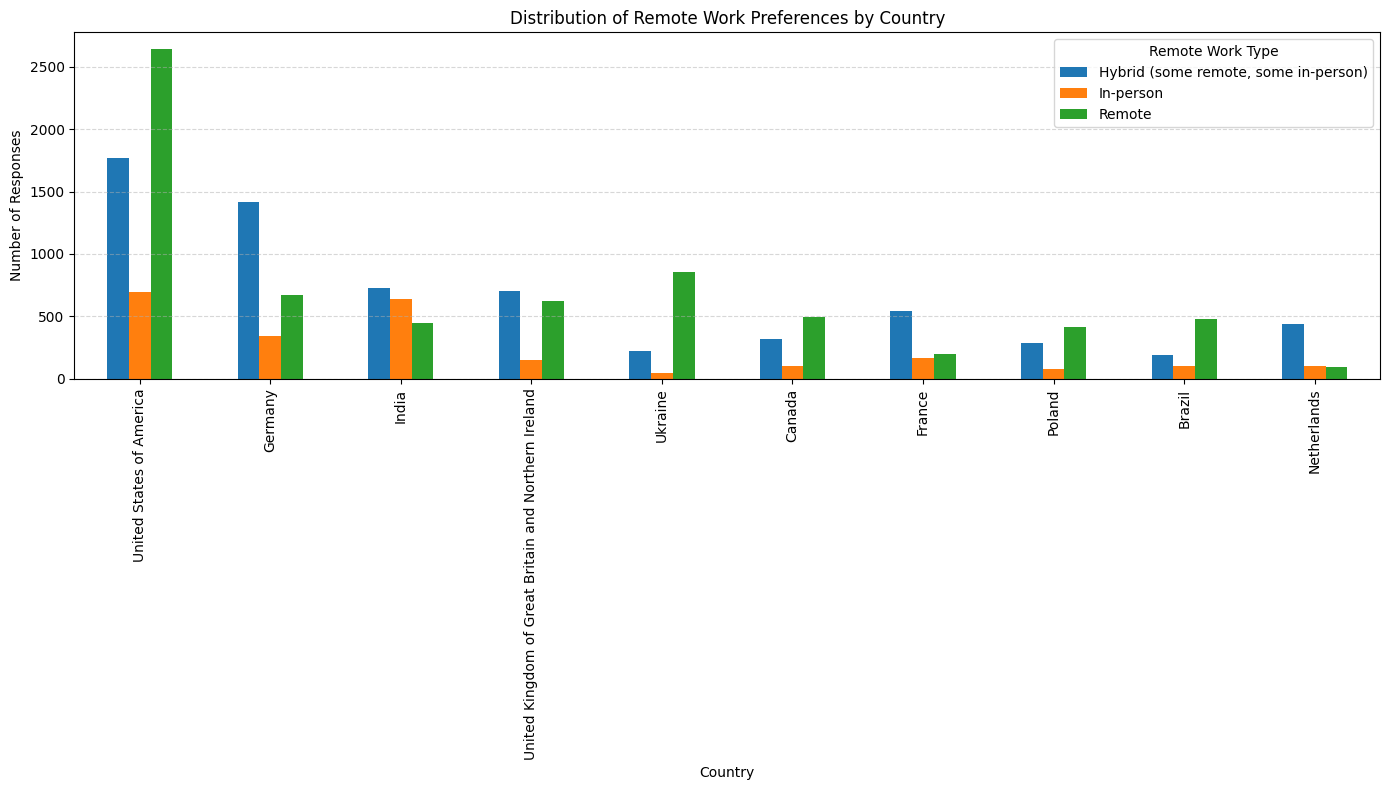

In [11]:
## Write your code here
df = df.dropna(subset=['RemoteWork'])
df['RemoteWork'].unique()
print
remote_by_country = df.groupby(['Country', 'RemoteWork']).size().unstack(fill_value=0)
top_countries = remote_by_country.sum(axis=1).sort_values(ascending=False).head(10)
remote_by_country_top = remote_by_country.loc[top_countries.index]

remote_by_country_top.plot(kind='bar', figsize=(14, 8))
plt.title('Distribution of Remote Work Preferences by Country')
plt.ylabel('Number of Responses')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.legend(title='Remote Work Type')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

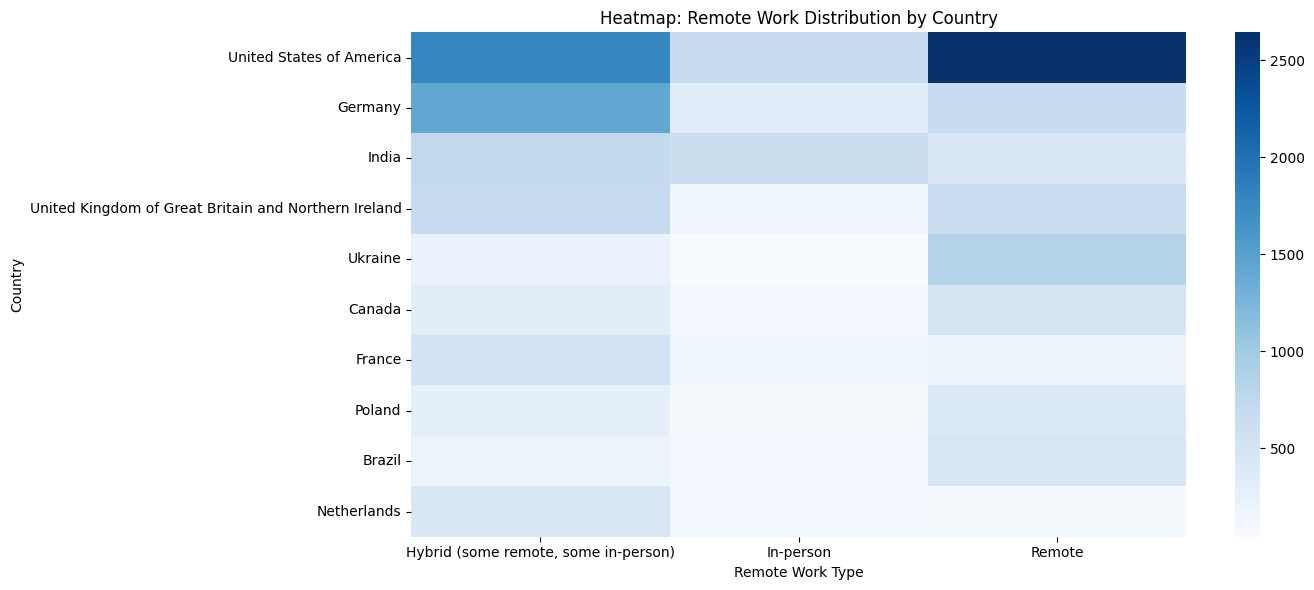

In [12]:
plt.figure(figsize=(14, 6))
sns.heatmap(remote_by_country_top, annot=False, fmt='d', cmap='Blues')

plt.title('Heatmap: Remote Work Distribution by Country')
plt.xlabel('Remote Work Type')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


0.1037068607599362


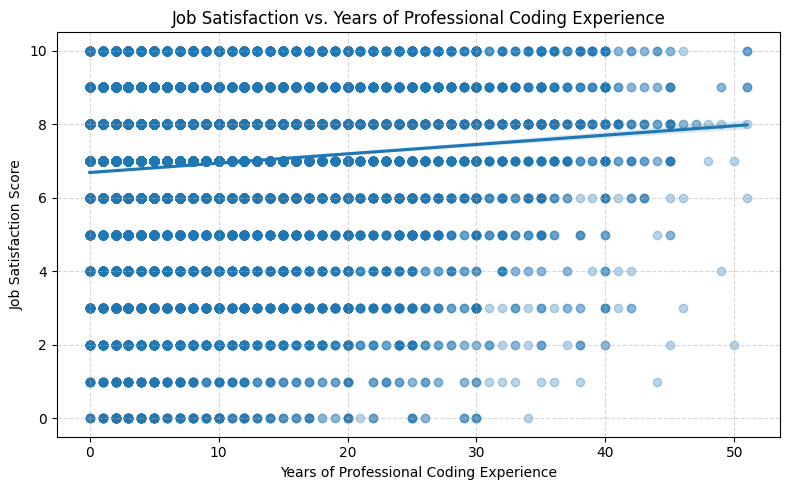

In [14]:
## Write your code here
correlation = df[['YearsCodePro', 'JobSat']].dropna().corr()
print(correlation.iloc[0, 1])

plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='YearsCodePro', y='JobSat', scatter_kws={'alpha':0.3})
plt.title('Job Satisfaction vs. Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


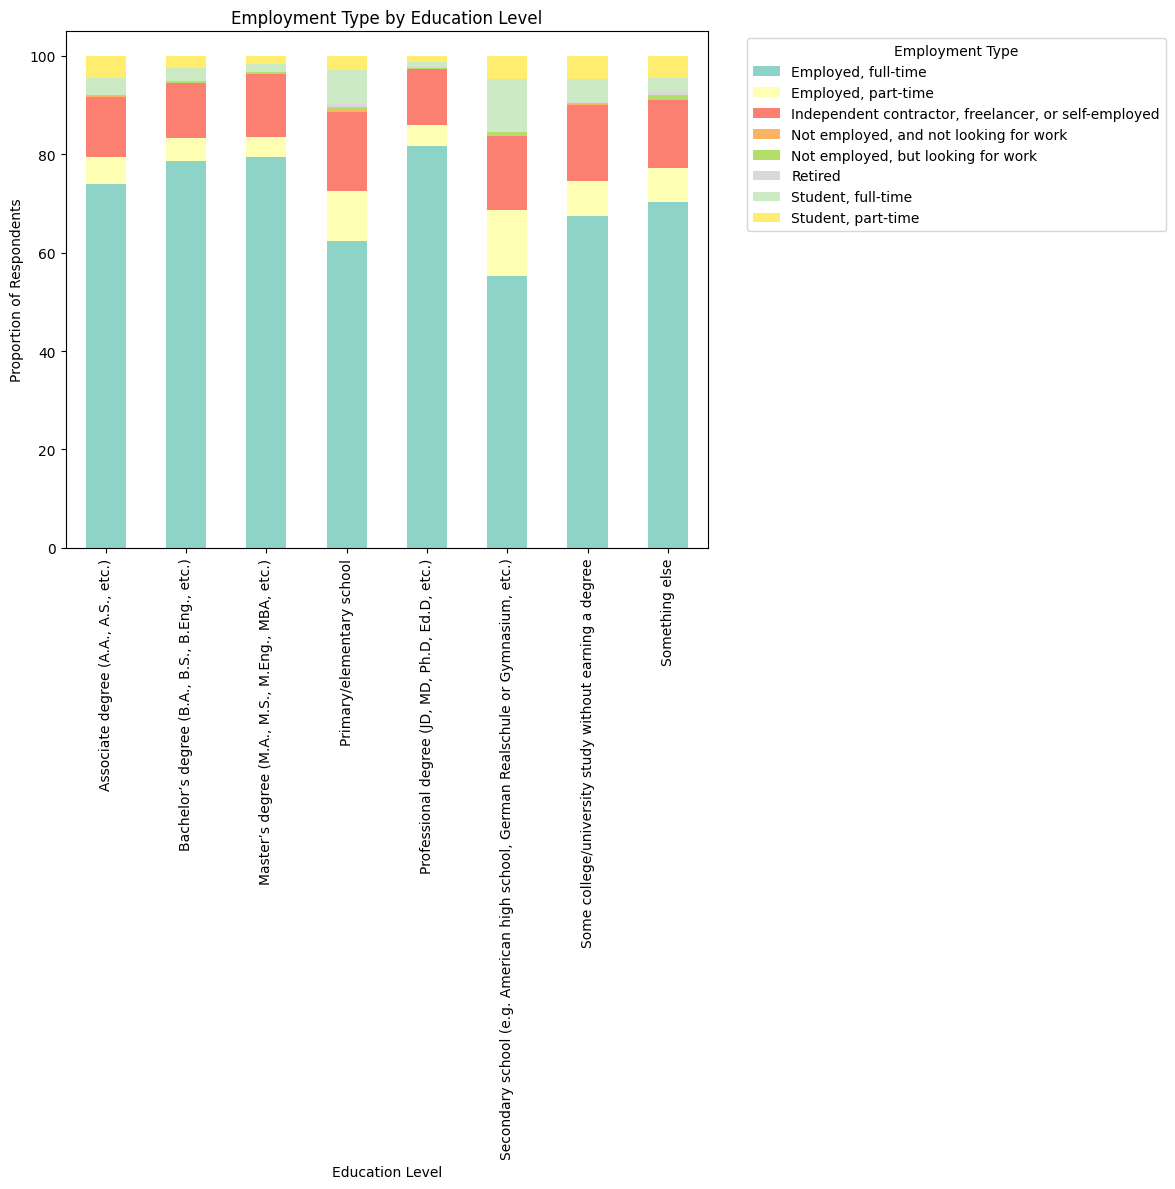

Employment,"Employed, full-time","Employed, part-time","Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time"
EdLevel,,,,,,,,
"Associate degree (A.A., A.S., etc.)",74.018692,5.420561,12.242991,0.093458,0.186916,0.093458,3.457944,4.485981
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",78.741156,4.545455,11.206781,0.026699,0.413830,0.020024,2.503004,2.543052
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",79.418393,4.099152,12.823264,0.075115,0.343384,0.042923,1.470115,1.727653
Primary/elementary school,62.285714,10.285714,16.000000,0.571429,0.571429,0.571429,6.857143,2.857143
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",81.746553,4.202232,11.359160,0.065660,0.262640,0.328299,0.853578,1.181878
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",55.347187,13.380639,15.002534,0.000000,0.810948,0.000000,10.694374,4.764318
Some college/university study without earning a degree,67.440174,7.034083,15.591008,0.096688,0.314237,0.145033,4.737733,4.641044
Something else,70.338983,6.779661,13.841808,0.282486,0.847458,0.564972,2.824859,4.519774


In [15]:
## Write your code here
df = df.dropna(subset=['EdLevel'])

edu_emp_ct = pd.crosstab(df1['EdLevel'], df1['Employment'],normalize='index') * 100

edu_emp_ct.plot(kind='bar', stacked=True, figsize=(12, 12), colormap='Set3')

plt.title('Employment Type by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
edu_emp_ct

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [16]:
## Write your code here
df.to_csv('cleaned_survey_data.csv', index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
